# 1. Google drive Mount

In [1]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 2. Define Directory

In [2]:
# 사용하기 전 변경해주어야 하는 파라미터
# BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
BASE_WORKING_DIR = "/content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/"
USERNAME = "park"

In [3]:
import os
# 사용하는 디렉토리 정의
DATA_BASE_PATH = os.path.join(BASE_WORKING_DIR, "data")
DATA_RAW_PATH = os.path.join(DATA_BASE_PATH, "raw")
DATA_EXPORT_PATH = os.path.join(DATA_BASE_PATH, "export")
DATA_CONV_USER_PATH = os.path.join(DATA_BASE_PATH, USERNAME)
DATA_CONV_PATH = os.path.join(DATA_BASE_PATH, "converted")
MODEL_PATH = os.path.join(BASE_WORKING_DIR, "model")
RESULT_PATH = os.path.join(BASE_WORKING_DIR, "result")

WORKING_DIR = os.path.join(BASE_WORKING_DIR, USERNAME)

print('Current Work Directory :',  os.getcwd(), '\n')
print('Username :',  USERNAME, '\n')

print("DATA_BASE_PATH : ", DATA_BASE_PATH)
print("DATA_RAW_PATH : ", DATA_RAW_PATH)
print("DATA_EXPORT_PATH : ", DATA_EXPORT_PATH)
print("DATA_CONV_USER_PATH : ", DATA_CONV_USER_PATH)
print("DATA_CONV_PATH : ", DATA_CONV_PATH)

print("MODEL_PATH : ", MODEL_PATH)

print("RESULT_PATH : ", RESULT_PATH)

print("WORKING_DIR : ", WORKING_DIR)


Current Work Directory : /content 

Username : park 

DATA_BASE_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data
DATA_RAW_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/raw
DATA_EXPORT_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/export
DATA_CONV_USER_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/park
DATA_CONV_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/data/converted
MODEL_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/model
RESULT_PATH :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/result
WORKING_DIR :  /content/gdrive/My Drive/Colab Notebooks/weather_bigcontest/4_code/park


In [4]:
# 데이터 무엇이 있는지 확인하자.
# 아래 코드를 수행하게 되면, "../input/"에서 리눅스 명령어 "ls"를 수행한 결과를 보여주게 된다. 이 때 나온 binary code를 "utf8"로 디코딩해서 보여준다.
from subprocess import check_output
print("===== Raw Data List =====\n", check_output(["ls", DATA_RAW_PATH]).decode("utf8"))
print("===== Export Data List =====\n" ,check_output(["ls", DATA_EXPORT_PATH]).decode("utf8"))
print("===== Converted User Data List =====\n" ,check_output(["ls", DATA_CONV_USER_PATH]).decode("utf8"))
print("===== Converted Data List =====\n" ,check_output(["ls", DATA_CONV_PATH]).decode("utf8"))
print("===== Model List =====\n" ,check_output(["ls", MODEL_PATH]).decode("utf8"))
print("===== Result file List =====\n" ,check_output(["ls", RESULT_PATH]).decode("utf8"))

===== Raw Data List =====
 plant1_train.csv
plant2_train.csv
plant2_train.gsheet
plant_test.csv
submit.csv
submit.gsheet

===== Export Data List =====
 dangjin_aws
seosan_asos
sinpyeong_aws
songak_forecast
songak_local
songsan_forecast
songsan_local

===== Converted User Data List =====
 backup_0.96model
data_all.csv
data_all_out.csv
data_all_out_in.csv
date_trend.csv
date_trend_point.csv
ExtraTreesClassifier_th_10.csv
GradientBoostingClassifier_all_feature_th_40.csv
lastplus_th_10.csv
last_th_08.csv
last_th_10.csv
model
model_cond_all.pkl
model_cond_all_plus_.pkl
model_hum_in.pkl
model_hum_out_loc.pkl
model_tem_coil.pkl
model_tem_in.pkl
model_tem_out_loc.pkl
plant1_by_loc.csv
plant1_by_loc.gsheet
plant2_by_loc.csv
plant_test_all_weather_feature_add_cluster_add_out.csv
plant_test_all_weather_feature_add_cluster_add_out_in.csv
plant_test_all_weather_feature_add_cluster_add_out_in.gsheet
plant_train_all_weather_feature_add_cluster.csv
predict.csv
RandomForestClassifier_th_10.csv
result.c

# 4. Import Library

In [5]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

# 파이썬 내장 라이브러리
import random
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy


# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


In [6]:
# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import lightgbm

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# interpolation 함수
import scipy.interpolate as spi

# model load
import pickle
from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

# 시각화 Style 설정하기
# print(plt.style.available)
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

# 5. Get the Data

## 1. plant data 가져오기

In [7]:
# plant 데이터 
data_all = pd.read_csv(os.path.join(DATA_CONV_PATH, "data_all_time_out_in.csv"))

# unnamed: 0 제거
data_all.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_all['date'] = data_all['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date())
# data_all['mea_ddhr'] = data_all['date'].apply(lambda x : datetime.strptime(x '%Y-%m-%d %H:%M:%S')) 

In [8]:
# test 데이터 info
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   210384 non-null  object 
 1   plant                  210384 non-null  int64  
 2   loc                    210384 non-null  int64  
 3   time                   210384 non-null  int64  
 4   dangjin-ta             210384 non-null  float64
 5   dangjin-hm             210384 non-null  float64
 6   dangjin-ws             210384 non-null  float64
 7   dangjin-rn             210384 non-null  float64
 8   sinpyeong-ta           210384 non-null  float64
 9   sinpyeong-ws           210384 non-null  float64
 10  sinpyeong-rn           210384 non-null  float64
 11  sinpyeong-lp           210384 non-null  float64
 12  sinpyeong-ap           210384 non-null  float64
 13  seosan-ta              210384 non-null  float64
 14  seosan-hm              210384 non-nu

In [9]:
data_all

,date,plant,loc,time,dangjin-ta,dangjin-hm,dangjin-ws,dangjin-rn,sinpyeong-ta,sinpyeong-ws,sinpyeong-rn,sinpyeong-lp,sinpyeong-ap,seosan-ta,seosan-hm,seosan-ws,seosan-rn,seosan-dew,seosan-sp,seosan-lp,seosan-ap,seosan-sr,seosan-ss,seosan-ground,songsan-ta,songsan-hm,songsan-ws,songsan-rn,songak-ta,songak-hm,songak-ws,songak-rn,seosan-ta-trend,seosan-hm-trend,seosan-ground-trend,seosan-ta-point,seosan-hm-point,seosan-ground-point,seosan-ta-changed,seosan-hm-changed,seosan-ground-changed,tem_out_loc,hum_out_loc,tem_in,hum_in,tem_coil
0,2016-04-01,1,1,0,6.8,41.2,0.3,0.0,7.2,0.9,0.0,1013.0,1015.7,8.8,41.0,1.5,0.0,-3.7,4.6,1012.1,1015.6,0.0,0.00,4.0,14.000000,40.0,0.6,0.0,13.800000,38.0,0.4,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,9.0000,42.0000,16.0000,24.0000,11.0000
1,2016-04-01,1,1,60,5.9,43.8,0.3,0.0,5.6,1.1,0.0,1012.6,1015.3,9.2,34.0,1.2,0.0,-5.8,4.0,1011.7,1015.2,0.0,0.00,3.4,16.299999,34.0,0.5,0.0,16.400000,31.0,0.8,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,8.2361,43.3841,14.3417,32.5948,10.6820
2,2016-04-01,1,1,120,5.5,45.5,0.3,0.0,5.1,0.0,0.0,1012.2,1014.9,9.2,33.0,1.1,0.0,-6.2,3.8,1011.3,1014.8,0.0,0.00,3.3,18.299999,29.0,0.8,0.0,18.700001,26.0,1.2,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,7.7333,47.4309,14.0079,34.7600,10.2975
3,2016-04-01,1,1,180,5.2,52.1,0.2,0.0,4.7,0.3,0.0,1012.2,1014.9,7.5,40.0,0.4,0.0,-5.2,4.2,1011.4,1014.9,0.0,0.00,2.8,19.600000,24.0,0.7,0.0,20.200001,22.0,1.0,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,7.0000,59.0000,14.0000,28.0000,10.0000
4,2016-04-01,1,1,240,4.7,47.1,0.0,0.0,3.7,1.1,0.0,1012.4,1015.1,4.8,56.0,0.6,0.0,-3.2,4.8,1011.6,1015.2,0.0,0.00,1.8,20.600000,25.0,2.2,0.0,21.500000,23.0,2.3,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,6.4159,47.5708,13.7150,34.6242,10.2397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2020-03-31,2,3,1140,9.8,43.5,0.6,0.0,10.4,2.0,0.0,1012.9,1015.3,9.6,46.0,1.1,0.0,-1.4,5.5,1012.3,1015.4,0.0,0.08,10.3,8.500000,58.0,1.4,0.0,8.500000,58.0,1.4,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,11.0199,43.8651,13.8034,35.3122,11.4007
210380,2020-03-31,2,3,1200,8.5,52.3,0.8,0.0,9.4,1.7,0.0,1013.4,1015.8,8.1,53.0,0.2,0.0,-0.9,5.7,1012.9,1016.0,0.0,0.00,8.9,8.300000,56.0,1.1,0.0,8.300000,56.0,1.1,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,10.0869,47.0679,13.3667,37.1549,11.0804
210381,2020-03-31,2,3,1260,7.6,64.4,0.7,0.0,8.7,2.4,0.0,1013.9,1016.3,7.4,59.0,0.6,0.0,-0.1,6.1,1013.4,1016.5,0.0,0.00,8.0,8.400000,51.0,1.3,0.0,8.400000,51.0,1.3,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,9.3965,60.0182,12.7654,42.6009,10.7654
210382,2020-03-31,2,3,1320,6.9,71.5,1.3,0.0,8.2,2.0,0.0,1013.9,1016.3,7.4,58.0,1.6,0.0,-0.3,6.0,1013.3,1016.4,0.0,0.00,7.8,9.400000,47.0,1.7,0.0,9.400000,47.0,1.7,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,8.3909,56.9864,12.7285,42.6748,10.7028


# mea_ddhr 만들기 (현재 사용 X)


In [ ]:
# data_all["mea_ddhr"] = 0

In [ ]:
# from datetime import datetime
# # date_start = datetime.date(2016,4,16)
# # date_end = datetime.date(2020,3,31)
# # date = date_start

# # while(date <= date_end):

# for i in range(len(data_all)):
#   if i % 10000 == 0:
#     print(i, "번째 작업중")
#   data_all.loc[i, "mea_ddhr"] =  datetime.strptime(str(data_all.loc[i, "date"]) + f' {int(data_all.loc[i, "time"]/60)}:00:00', '%Y-%m-%d %H:%M:%S')

# data_all

0 번째 작업중
10000 번째 작업중
20000 번째 작업중
30000 번째 작업중
40000 번째 작업중
50000 번째 작업중
60000 번째 작업중
70000 번째 작업중
80000 번째 작업중
90000 번째 작업중
100000 번째 작업중
110000 번째 작업중
120000 번째 작업중
130000 번째 작업중
140000 번째 작업중
150000 번째 작업중
160000 번째 작업중
170000 번째 작업중
180000 번째 작업중
190000 번째 작업중
200000 번째 작업중
210000 번째 작업중


,date,plant,loc,time,dangjin-ta,dangjin-hm,dangjin-ws,dangjin-rn,sinpyeong-ta,sinpyeong-ws,sinpyeong-rn,sinpyeong-lp,sinpyeong-ap,seosan-ta,seosan-hm,seosan-ws,seosan-rn,seosan-dew,seosan-sp,seosan-lp,seosan-ap,seosan-sr,seosan-ss,seosan-ground,songsan-ta,songsan-hm,songsan-ws,songsan-rn,songak-ta,songak-hm,songak-ws,songak-rn,seosan-ta-trend,seosan-hm-trend,seosan-ground-trend,seosan-ta-point,seosan-hm-point,seosan-ground-point,seosan-ta-changed,seosan-hm-changed,seosan-ground-changed,tem_out_loc,hum_out_loc,tem_in,hum_in,tem_coil,mea_ddhr
0,2016-04-01,1,1,0,6.8,41.2,0.3,0.0,7.2,0.9,0.0,1013.0,1015.7,8.8,41.0,1.5,0.0,-3.7,4.6,1012.1,1015.6,0.0,0.00,4.0,14.000000,40.0,0.6,0.0,13.800000,38.0,0.4,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,9.0000,42.0000,16.0000,24.0000,11.0000,2016-04-01 00:00:00
1,2016-04-01,1,1,60,5.9,43.8,0.3,0.0,5.6,1.1,0.0,1012.6,1015.3,9.2,34.0,1.2,0.0,-5.8,4.0,1011.7,1015.2,0.0,0.00,3.4,16.299999,34.0,0.5,0.0,16.400000,31.0,0.8,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,8.2361,43.3841,14.3417,32.5948,10.6820,2016-04-01 01:00:00
2,2016-04-01,1,1,120,5.5,45.5,0.3,0.0,5.1,0.0,0.0,1012.2,1014.9,9.2,33.0,1.1,0.0,-6.2,3.8,1011.3,1014.8,0.0,0.00,3.3,18.299999,29.0,0.8,0.0,18.700001,26.0,1.2,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,7.7333,47.4309,14.0079,34.7600,10.2975,2016-04-01 02:00:00
3,2016-04-01,1,1,180,5.2,52.1,0.2,0.0,4.7,0.3,0.0,1012.2,1014.9,7.5,40.0,0.4,0.0,-5.2,4.2,1011.4,1014.9,0.0,0.00,2.8,19.600000,24.0,0.7,0.0,20.200001,22.0,1.0,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,7.0000,59.0000,14.0000,28.0000,10.0000,2016-04-01 03:00:00
4,2016-04-01,1,1,240,4.7,47.1,0.0,0.0,3.7,1.1,0.0,1012.4,1015.1,4.8,56.0,0.6,0.0,-3.2,4.8,1011.6,1015.2,0.0,0.00,1.8,20.600000,25.0,2.2,0.0,21.500000,23.0,2.3,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,6.4159,47.5708,13.7150,34.6242,10.2397,2016-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,2020-03-31,2,3,1140,9.8,43.5,0.6,0.0,10.4,2.0,0.0,1012.9,1015.3,9.6,46.0,1.1,0.0,-1.4,5.5,1012.3,1015.4,0.0,0.08,10.3,8.500000,58.0,1.4,0.0,8.500000,58.0,1.4,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,11.0199,43.8651,13.8034,35.3122,11.4007,2020-03-31 19:00:00
210380,2020-03-31,2,3,1200,8.5,52.3,0.8,0.0,9.4,1.7,0.0,1013.4,1015.8,8.1,53.0,0.2,0.0,-0.9,5.7,1012.9,1016.0,0.0,0.00,8.9,8.300000,56.0,1.1,0.0,8.300000,56.0,1.1,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,10.0869,47.0679,13.3667,37.1549,11.0804,2020-03-31 20:00:00
210381,2020-03-31,2,3,1260,7.6,64.4,0.7,0.0,8.7,2.4,0.0,1013.9,1016.3,7.4,59.0,0.6,0.0,-0.1,6.1,1013.4,1016.5,0.0,0.00,8.0,8.400000,51.0,1.3,0.0,8.400000,51.0,1.3,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,9.3965,60.0182,12.7654,42.6009,10.7654,2020-03-31 21:00:00
210382,2020-03-31,2,3,1320,6.9,71.5,1.3,0.0,8.2,2.0,0.0,1013.9,1016.3,7.4,58.0,1.6,0.0,-0.3,6.0,1013.3,1016.4,0.0,0.00,7.8,9.400000,47.0,1.7,0.0,9.400000,47.0,1.7,0.0,4,4,3,4,1,4,17.982983,67.942943,29.674775,8.3909,56.9864,12.7285,42.6748,10.7028,2020-03-31 22:00:00


In [ ]:
# data_all.to_csv(os.path.join(DATA_CONV_PATH, "data_all_time_out_in_add_mea_ddhr.csv"))

NameError: ignored

# mea_ddhr 까지 있는 데이터 불러오기

In [10]:
data_all = pd.read_csv(os.path.join(DATA_CONV_PATH, "data_all_time_out_in_add_mea_ddhr.csv"))

data_all['date'] = data_all['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date())
data_all['mea_ddhr'] = data_all['mea_ddhr'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) 

In [25]:
from datetime import timedelta
import matplotlib.patches as mpatches
def futureTrendPlot(df, plant, loc, start_time):
  on_df = df
  on_df = on_df[on_df["plant"] == plant]
  on_df = on_df[on_df["loc"] == loc]
  on_df = on_df[on_df["mea_ddhr"] >= start_time]
  on_df = on_df[on_df["mea_ddhr"] <= start_time + timedelta(days=2)]
  
  on_df = on_df[["mea_ddhr", "tem_in", "hum_in", "tem_coil", "tem_out_loc", "hum_out_loc"]]
  
  day1 = datetime.strptime(str(start_time.date() + timedelta(days=1)) + " 00:00:00", '%Y-%m-%d %H:%M:%S')
  day2 = datetime.strptime(str(start_time.date() + timedelta(days=2)) + " 00:00:00", '%Y-%m-%d %H:%M:%S')

  x = on_df["mea_ddhr"]
  tem_in_list = on_df["tem_in"]
  tem_coil_list = on_df["tem_coil"]
  tem_out_loc_list = on_df["tem_out_loc"]
  hum_in_list = on_df["hum_in"]
  hum_out_loc_list = on_df["hum_out_loc"]

  # 결로가 일어났을 때 습도의 최소값이 60
  # 1분위수는 80

  # 온도차가 tem_in - tem_coil >= 2.5 일때, hum이 65 이상이면 라인을 그려준다.
  tem_in_tem_coil = np.array(tem_in_list) - np.array(tem_coil_list)
  over_tem_th_kernel = tem_in_tem_coil >= 2.5
  over_hum_th_kernel = np.array(hum_in_list) >= 65
  condense_kernel = over_tem_th_kernel & over_hum_th_kernel
  print("결로 발생이 의심되는 시각은 다음과 같습니다.")
  print("환기를 통해 공장내 공기 순환이 필요한 시기입니다.")
  for i, j in zip(range(len(x[condense_kernel])), x[condense_kernel]):
    print(i+1, " : ", j)

  # Temparature
  fig = plt.figure(figsize=(15,5))
  plt.title("Temparature Trend in Next Two Days")
  plt.xlabel("Date")
  plt.ylabel('Temperature')
  
  a = plt.plot(x, tem_in_list, c='y',
            lw=3, ls="-", marker="o", label = "tem_in")
  b = plt.plot(x, tem_coil_list, c='g',
            lw=3, ls="--", marker="o", label = "tem_coil")
  c = plt.plot(x, tem_out_loc_list, c='r',
            lw=3, ls="--", marker="o", label = "tem_out_loc")
  d = plt.axvline(x=day1, color='k', linestyle='-', linewidth=1, label = "day1 start")
  e = plt.axvline(x=day2, color='g', linestyle='-', linewidth=1, label = "day2 start")

  if np.any(condense_kernel):
    danger_date = x[condense_kernel]
    for date in danger_date:
      plt.axvline(x=date, color='r', linestyle='--', linewidth=3)
      # plt.annotate('위험 지역 표현',xy=(10,1),xytext=(5,3),arrowprops={'color':'red'})

  plt.yticks(np.arange(-10, 40, step=5))
  plt.legend(loc='upper left')
  plt.show()

  # Humidity
  fig = plt.figure(figsize=(15,6))
  plt.title("Humidity Trend in Next Two Days")
  plt.xlabel("Date")
  plt.ylabel("Humidity")

  plt.plot(x, hum_in_list, c='m',
            lw=3, ls="-", marker="o", label = "hum_in")
  plt.plot(x, hum_out_loc_list, c='c',
            lw=3, ls="-", marker="o", label = "hum_out_loc")
  plt.axvline(x=day1, color='k', linestyle='-', linewidth=1, label = "day1 start")
  plt.axvline(x=day2, color='g', linestyle='-', linewidth=1, label = "day2 start")
  
  if np.any(condense_kernel):
    danger_date = x[condense_kernel]
    for date in danger_date:
      plt.axvline(x=date, color='r', linestyle='--', linewidth=3)

  plt.yticks(np.arange(0, 120, step=15))
  plt.legend(loc='upper left')
  plt.show()


## 미래 트렌드 보기

결로 발생이 의심되는 시각은 다음과 같습니다.
환기를 통해 공장내 공기 순환이 필요한 시기입니다.
1  :  2018-12-17 03:00:00
2  :  2018-12-17 04:00:00


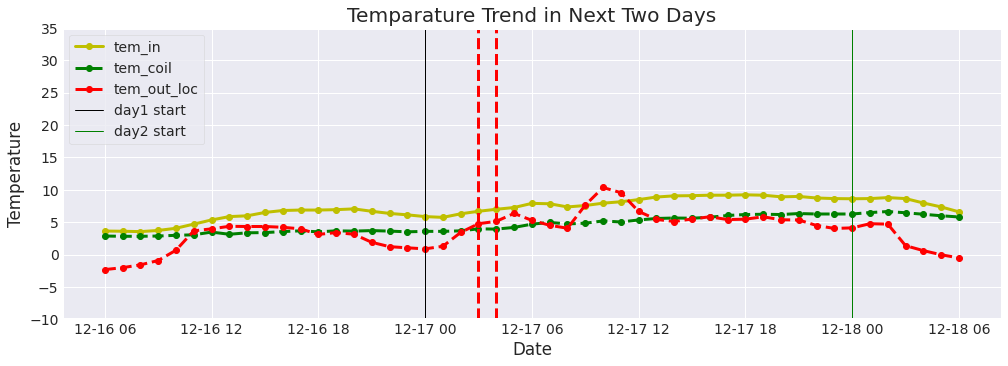

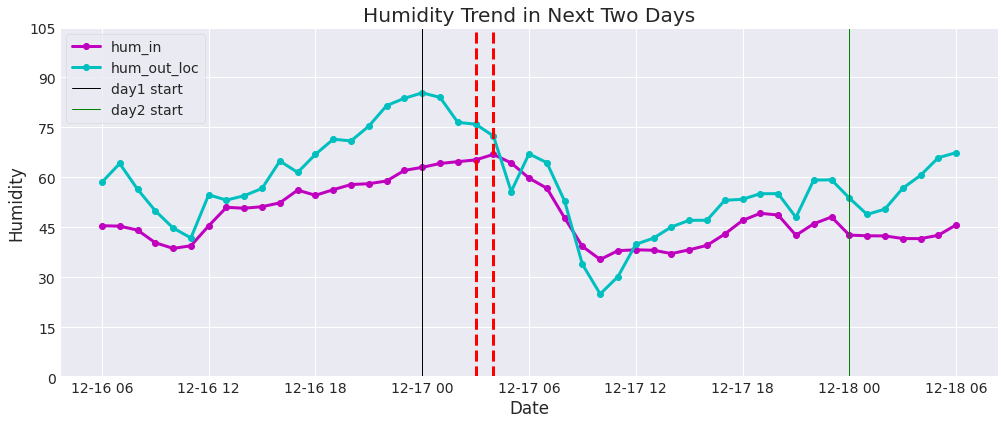

In [26]:
# TIME = "2019-12-16 12:00:00"
TIME = "2018-12-16 6:00:00"
# TIME = "2016-12-19 12:00:00"
PLANT = 1
LOC = 1

start_time = datetime.strptime(TIME, '%Y-%m-%d %H:%M:%S')
futureTrendPlot(data_all, PLANT, LOC, start_time)


In [ ]:
a = np.array([5, 4, 7, 3, 2, 4])
b = np.array([1, 4, 3, 6, 10, 1])

c = np.array([10, 1, 1, 1, 20, 4])

temp1 = a-b >= 0
temp2 = c >= 10
print(temp1)
print(temp2)
print(temp1&temp2)
# np.any((a-b >= 0))

# a[(a-b >= 0)]

[ True  True  True False False  True]
[ True False False False  True False]
[ True False False False False False]
